In [66]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [8]:
columns = ["userId", "venueId", "venueCategoryId", "venueCategory", "latitude", "londitude", "timeZoneOffset", "utcTime"]
df = pd.read_csv("./dataset_TSMC2014/dataset_TSMC2014_NYC.txt", sep="\t", header=None, names=columns)

In [13]:
df.head(20)

,userId,venueId,venueCategoryId,venueCategory,latitude,londitude,timeZoneOffSet,utcTime
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012
6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121,-240,Tue Apr 03 18:04:38 +0000 2012
7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341,-240,Tue Apr 03 18:04:42 +0000 2012
8,428,4ce1863bc4f6a35d8bd2db6c,4bf58dd8d48988d103941735,Home (private),40.619151,-74.035888,-240,Tue Apr 03 18:06:18 +0000 2012
9,877,4be319b321d5a59352311811,4bf58dd8d48988d10a951735,Bank,40.619006,-73.990375,-240,Tue Apr 03 18:06:19 +0000 2012


In [12]:
df.timeZoneOffSet.unique()

array([-240,  540,  120, -300, -420,  420,  480, -360, -180,  660])

## Check Data Sparcity

#### How much time is apart from check-in to check-in?
get average_gap. <br> Assumption: user has stayed in the same time zone all along

In [31]:
def getDateTime(utc_time:str):
    return dt.datetime.strptime(utc_time, "%a %b %d %H:%M:%S +0000 %Y")
    

In [26]:
df['datetime'] = df['utcTime'].apply(getDateTime)

In [23]:
df.userId.unique()

array([ 470,  979,   69, ...,  911, 1081,  849])

In [ ]:
def getAvgTimeGap(df):
    df = df.sort_values(by=['datetime'])
    

In [28]:
ser = df.loc[df['userId'] == 470]

In [30]:
ser.sort_values(by=['datetime'])

,userId,venueId,venueCategoryId,venueCategory,latitude,londitude,timeZoneOffSet,utcTime,datetime
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,2012-04-03 18:00:09
626,470,4e08ad8cd4c03ae0b9d11f93,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.683178,-73.965746,-240,Tue Apr 03 23:36:34 +0000 2012,2012-04-03 23:36:34
650,470,4be09b7fcb81c9b62069668b,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.624513,-73.965070,-240,Tue Apr 03 23:46:46 +0000 2012,2012-04-03 23:46:46
652,470,49f50c9ff964a5208a6b1fe3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.677611,-73.963748,-240,Tue Apr 03 23:47:16 +0000 2012,2012-04-03 23:47:16
654,470,4a6a09b1f964a52071cc1fe3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.702752,-73.990696,-240,Tue Apr 03 23:47:49 +0000 2012,2012-04-03 23:47:49
655,470,49e63b62f964a52027641fe3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.687583,-73.989895,-240,Tue Apr 03 23:48:15 +0000 2012,2012-04-03 23:48:15
660,470,45795395f964a520d23e1fe3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.679694,-73.974252,-240,Tue Apr 03 23:48:51 +0000 2012,2012-04-03 23:48:51
674,470,4c9d89017ada199cf0a493bc,4bf58dd8d48988d111941735,Japanese Restaurant,40.705436,-74.008348,-240,Tue Apr 03 23:51:33 +0000 2012,2012-04-03 23:51:33
677,470,4b5b92def964a5201d0829e3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.599278,-73.990891,-240,Tue Apr 03 23:52:01 +0000 2012,2012-04-03 23:52:01
678,470,4baea553f964a5206dca3be3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.657351,-73.956644,-240,Tue Apr 03 23:52:25 +0000 2012,2012-04-03 23:52:25


In [48]:
ser['datetime']

0       2012-04-03 18:00:09
626     2012-04-03 23:36:34
650     2012-04-03 23:46:46
652     2012-04-03 23:47:16
654     2012-04-03 23:47:49
655     2012-04-03 23:48:15
660     2012-04-03 23:48:51
674     2012-04-03 23:51:33
677     2012-04-03 23:52:01
678     2012-04-03 23:52:25
700     2012-04-04 00:00:22
730     2012-04-04 00:10:17
736     2012-04-04 00:12:07
738     2012-04-04 00:13:09
744     2012-04-04 00:13:51
747     2012-04-04 00:14:37
759     2012-04-04 00:18:45
762     2012-04-04 00:19:37
965     2012-04-04 02:16:45
966     2012-04-04 02:17:04
968     2012-04-04 02:17:40
969     2012-04-04 02:18:00
970     2012-04-04 02:18:21
973     2012-04-04 02:19:26
975     2012-04-04 02:20:09
1125    2012-04-04 05:02:33
1127    2012-04-04 05:03:47
1148    2012-04-04 05:18:00
1162    2012-04-04 05:47:12
2084    2012-04-04 18:00:09
                ...        
32058   2012-04-23 12:40:30
32696   2012-04-23 18:00:09
36162   2012-04-25 17:00:11
36312   2012-04-25 18:00:13
37940   2012-04-26 1

In [62]:
diff_df = pd.DataFrame(data=ser['datetime'].diff()[1:])

In [70]:
diff_df['datetime'].mean().seconds

18609

In [71]:
avg_diff = {}
for user in df['userId']:
    avg_diff[user] = pd.DataFrame(df.loc[df['userId'] == user]['datetime'].diff()[1:])['datetime'].mean().seconds/60

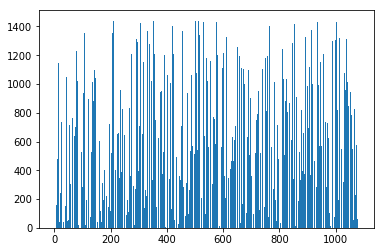

In [72]:
plt.bar(list(avg_diff.keys()), avg_diff.values())
plt.show()